In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes, tree
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('data_cleaning.csv')

In [3]:
X, y = df.drop(['Luxury','category','hasPool', 'isNewBuilt', 'hasYard','Unnamed: 0','cityCode'], axis=1), df.Luxury
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [4]:
param_grid= dict(
    max_depth = [3,4,5,6,7,8,9,10],
    min_child_weight=[1,2,3,4,5,6,7,8,9,10,11]
)
xg_grid_search = XGBClassifier()
xg_grid = GridSearchCV(xg_grid_search, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
xg_grid.fit(X_train, y_train)
xg_grid_pred = xg_grid.predict(X_test)

xg_best_params = xg_grid.best_params_
xg_best_estimator = xg_grid.best_estimator_
xg_best_cm = confusion_matrix(y_test, xg_grid_pred)
xg_best_cr = classification_report(y_test, xg_grid_pred)

print(xg_best_params)
print(xg_best_estimator)
print('confusion matrix:')
print(xg_best_cm)
print(xg_best_cr)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 7, 'min_child_weight': 10}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=7, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
confusion 

In [5]:
xg_y_score = xg_grid.predict_proba(X_test)[:,1]
xg_grid_fpr, xg_grid_tpr, auc_thresholds = roc_curve(y_test, xg_y_score)
roc_auc_xg_grid = auc(xg_grid_fpr, xg_grid_tpr)
print(roc_auc_xg_grid)

0.7738583314839258


In [6]:
# best params and get test scores
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=7, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor=None, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
xgBoost_v = XGBClassifier()
xgBoost_v.fit(X_train, y_train)
xgBoost_pred_v = xgBoost_v.predict(X_test)

xgBoost_ac_v = xgBoost_v.score(X_test, y_test)
xgBoost_precision_v = precision_score(y_test, xgBoost_pred_v)
xgBoost_recall_v = recall_score(y_test, xgBoost_pred_v)
xgBoost_f1_v = f1_score(y_test, xgBoost_pred_v)

xgBoost_y_score_v = xgBoost_v.predict_proba(X_test)[:, 1]
xgBoost_fpr_v, xgBoost_tpr_v, auc_thresholds_v = roc_curve(y_test, xgBoost_y_score_v)
roc_auc_xgb_v = auc(xgBoost_fpr_v, xgBoost_tpr_v)

[10:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [8]:
xgBoost = XGBClassifier()
xgBoost.fit(X_train, y_train)
xgBoost_pred = xgBoost.predict(X_test)

xgBoost_ac = xgBoost.score(X_test, y_test)
xgBoost_precision = precision_score(y_test, xgBoost_pred)
xgBoost_recall = recall_score(y_test, xgBoost_pred)
xgBoost_f1 = f1_score(y_test, xgBoost_pred)

xgBoost_y_score = xgBoost.predict_proba(X_test)[:, 1]
xgBoost_fpr, xgBoost_tpr, auc_thresholds = roc_curve(y_test, xgBoost_y_score)
roc_auc_xgb = auc(xgBoost_fpr, xgBoost_tpr)

c:\users\15107\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [9]:
print('XGBoost val score: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (xgBoost_ac_v, 
         xgBoost_precision_v, 
         xgBoost_recall_v,
         xgBoost_f1_v,
         roc_auc_xgb_v)
     )
print('XGBoost test score: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (xgBoost_ac, 
         xgBoost_precision, 
         xgBoost_recall,
         xgBoost_f1,
         roc_auc_xgb)
     )

XGBoost val score: 
 Accuracy: 0.8762 
 Precision: 0.3867 
 Recall: 0.1602 
 F1: 0.2266 
 ROC: 0.7607
XGBoost test score: 
 Accuracy: 0.8625 
 Precision: 0.4021 
 Recall: 0.1523 
 F1: 0.2210 
 ROC: 0.7916


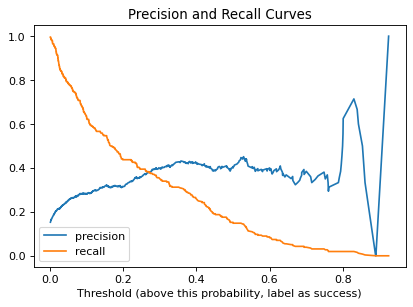

In [10]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, xgBoost.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as success)');
plt.title('Precision and Recall Curves');

In [11]:
from numpy import argmax
J = xgBoost_tpr - xgBoost_fpr
ix = argmax(J)
best_thresh = auc_thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.057994


In [12]:
def make_confusion_matrix(model, threshold=0.5):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    deposit_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(deposit_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
                xticklabels=['basic', 'luxury'],
                yticklabels=['basic', 'luxury']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

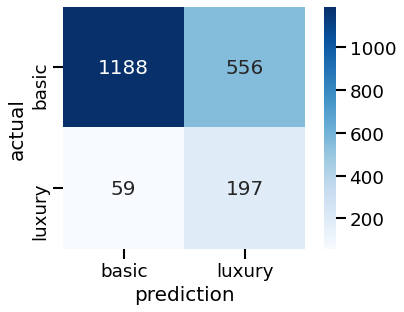

In [23]:

make_confusion_matrix(xgBoost, 0.057994)

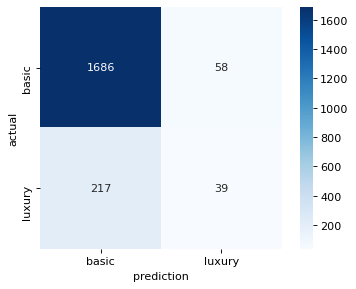

In [14]:
make_confusion_matrix(xgBoost, 0.5)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

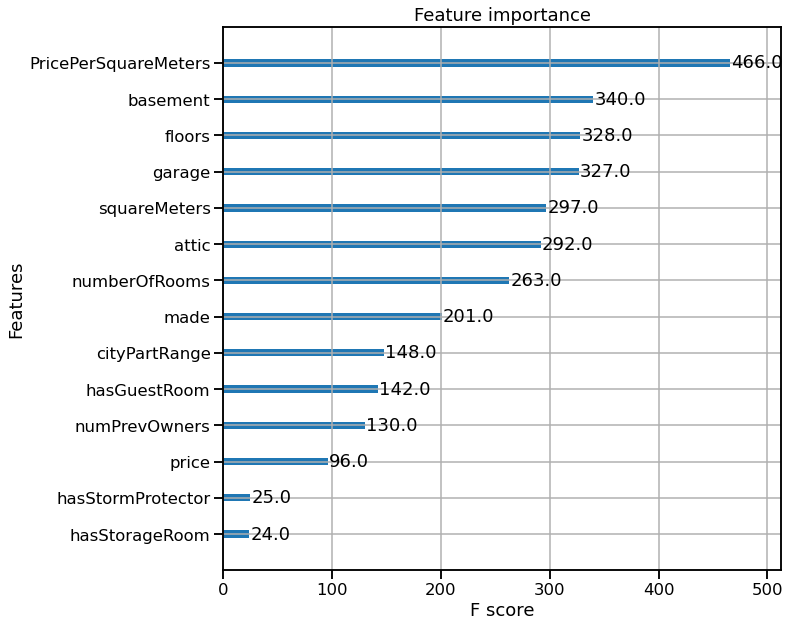

In [17]:
sns.set_context('talk')
fig, ax = plt.subplots(1,1, figsize=(10,10))
xgb.plot_importance(xgBoost, max_num_features=30, ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

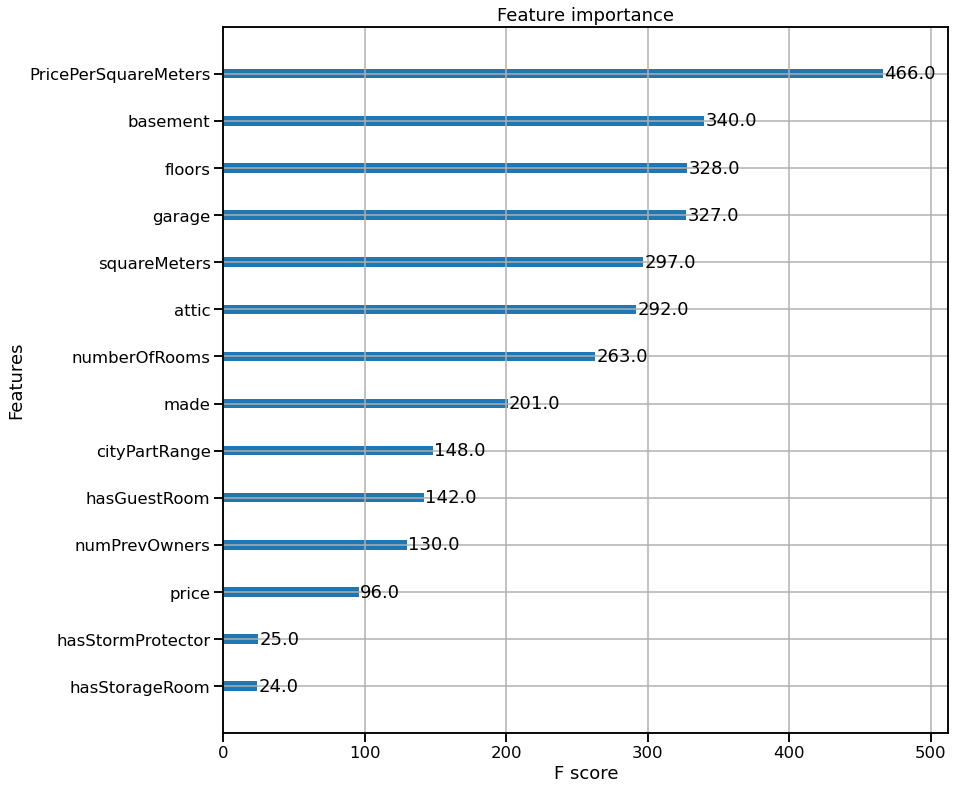

In [22]:
sns.set_context()
fig, ax = plt.subplots(1,1, figsize=(13,13))
xgb.plot_importance(xgBoost, max_num_features=50, ax=ax)